# Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling Perform following steps:
1.	Read the dataset.
2.	Distinguish the feature and target set and divide the data set into training and test sets.
3.	Normalize the train and test data.
4.	Initialize and build the model. Identify the points of improvement and implement the same.
5.	Print the accuracy score and confusion matrix.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.drop(columns=['CustomerId', 'Surname', 'RowNumber'], inplace=True)

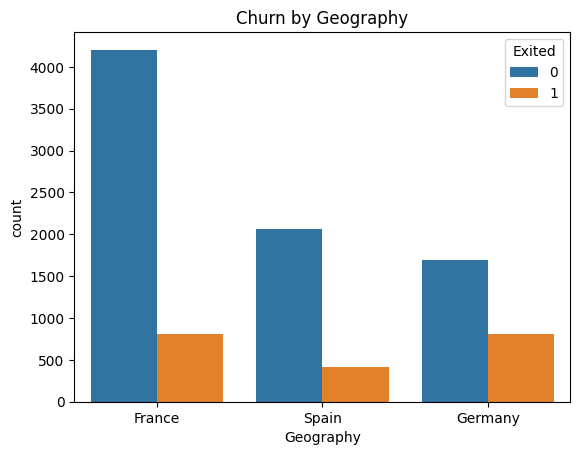

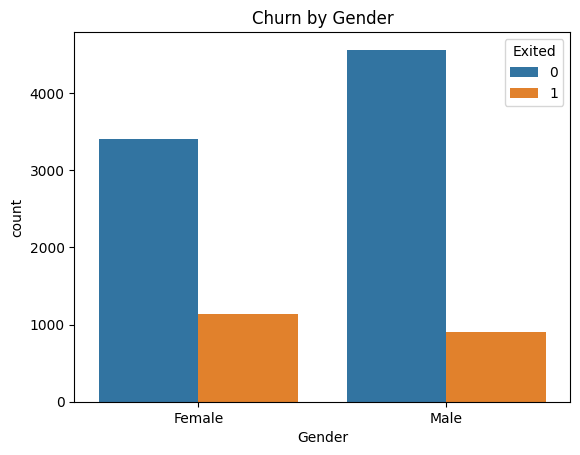

In [5]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Churn by Geography')
plt.show()

sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Churn by Gender')
plt.show()


Convert Categorical Variables

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Exited')
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Normalize data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


This neural network model in Keras has:

Three Layers:

Input Layer: Implicitly included, matching the feature count of X_train.
Two Hidden Layers:
The first hidden layer has 64 neurons with a ReLU activation function.
The second hidden layer has 32 neurons with a ReLU activation function.
Output Layer:
A single neuron with a sigmoid activation function for binary classification (output ranges between 0 and 1).
Compilation and Training:

Optimizer: Adam (an efficient choice for adaptive learning rates).
Loss: Binary cross-entropy, suited for binary outcomes.
Metrics: Accuracy to evaluate model performance.
Training: The model trains for 50 epochs with a batch size of 32, using 20% of the training data for validation (validation split of 0.2).
This structure has two main hidden layers, where neurons successively reduce from 64 to 32 before the output layer. It is a relatively simple architecture, but it has enough complexity to capture patterns within the data efficiently for binary classification tasks like predicting customer churn.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


d:\collegePrograms\sem7\prac\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7857 - loss: 0.5001 - val_accuracy: 0.8388 - val_loss: 0.4031
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8467 - loss: 0.3941 - val_accuracy: 0.8425 - val_loss: 0.3736
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8499 - loss: 0.3793 - val_accuracy: 0.8512 - val_loss: 0.3606
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8559 - loss: 0.3559 - val_accuracy: 0.8537 - val_loss: 0.3522
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8566 - loss: 0.3441 - val_accuracy: 0.8550 - val_loss: 0.3500
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8610 - loss: 0.3440 - val_accuracy: 0.8469 - val_loss: 0.3485
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8592 - loss: 0.3358 - val_accuracy: 0.8512 - val_loss: 0.3440
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8593 - loss: 0.3328 - val_accuracy

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.859
Confusion Matrix:
[[1537   70]
 [ 212  181]]


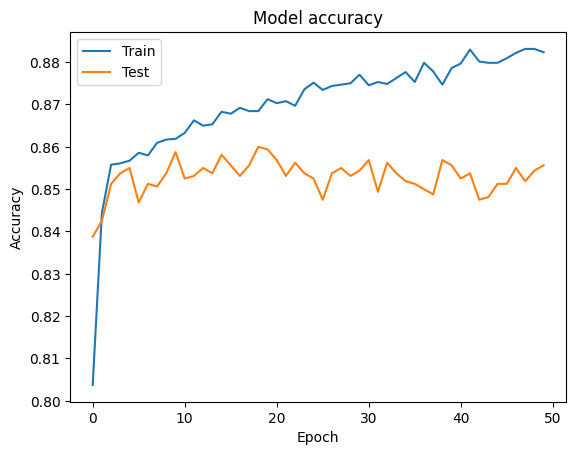

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
